In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data1=pd.read_csv('big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.0/002/Dexcom_002.csv')

In [3]:
data1.isnull().sum()

Index                                    0
Timestamp (YYYY-MM-DDThh:mm:ss)         12
Event Type                               0
Event Subtype                         2124
Patient Info                          2127
Device Info                           2130
Source Device ID                         4
Glucose Value (mg/dL)                    8
Insulin Value (u)                     2131
Carb Value (grams)                    2131
Duration (hh:mm:ss)                   2130
Glucose Rate of Change (mg/dL/min)    2129
Transmitter Time (Long Integer)         12
dtype: int64

In [6]:
data1.iloc[:,1].isnull().sum()

12

In [9]:
data1.shape

(2119, 13)

In [8]:
data1=data1.iloc[12:,:]
data1.head(20)

,Index,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer)
12,13,2020-02-21 11:08:36,EGV,NaN,NaN,NaN,Android G6,186.0,NaN,NaN,NaN,NaN,9901.0
13,14,2020-02-21 11:13:36,EGV,NaN,NaN,NaN,Android G6,181.0,NaN,NaN,NaN,NaN,10201.0
14,15,2020-02-21 11:18:36,EGV,NaN,NaN,NaN,Android G6,175.0,NaN,NaN,NaN,NaN,10501.0
15,16,2020-02-21 11:23:35,EGV,NaN,NaN,NaN,Android G6,168.0,NaN,NaN,NaN,NaN,10801.0
16,17,2020-02-21 11:28:36,EGV,NaN,NaN,NaN,Android G6,163.0,NaN,NaN,NaN,NaN,11101.0
17,18,2020-02-21 11:33:35,EGV,NaN,NaN,NaN,Android G6,160.0,NaN,NaN,NaN,NaN,11401.0
18,19,2020-02-21 11:38:35,EGV,NaN,NaN,NaN,Android G6,157.0,NaN,NaN,NaN,NaN,11701.0
19,20,2020-02-21 11:43:35,EGV,NaN,NaN,NaN,Android G6,155.0,NaN,NaN,NaN,NaN,12001.0
20,21,2020-02-21 11:48:35,EGV,NaN,NaN,NaN,Android G6,151.0,NaN,NaN,NaN,NaN,12301.0
21,22,2020-02-21 11:53:34,EGV,NaN,NaN,NaN,Android G6,146.0,NaN,NaN,NaN,NaN,12600.0


In [8]:
data2=pd.read_csv('big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.0/002/BVP_002.csv')

In [11]:
data2.head()

,datetime,bvp
0,2020-02-21 09:19:06.000000,-0.0
1,2020-02-21 09:19:06.015625,-0.0
2,2020-02-21 09:19:06.031250,-0.0
3,2020-02-21 09:19:06.046875,-0.0
4,2020-02-21 09:19:06.062500,-0.0


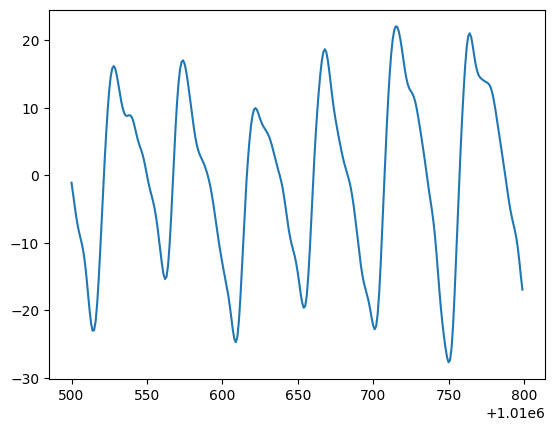

In [19]:
plt.plot(data2.iloc[1010500:1010800,1])

In [20]:
data2.shape

(40304473, 2)

In [21]:
indices=[]

In [27]:
for row in range(1,data2.shape[0]):
    if data2.iat[row,0][:16]!=data2.iat[row-1,0][:16]:
        indices.append(row)

In [28]:
len(indices)

10505

In [60]:
final_index=[]
glucose_values=[]
for index in indices:
    for j in range(data1.shape[0]):
        if data2.iat[index,0][:16]==data1.iat[j,1][:16]:
            final_index.append(index)
            glucose_values.append(data1.iat[j,7])

In [41]:
len(final_index)

1877

In [47]:
table=[]
for index in final_index:
    table.append(data2.iloc[index-1280:index+1280,1])

In [48]:
table=np.array(table)
table.shape

(1877, 2560)

In [49]:
df=pd.DataFrame(table)
df

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,-30.75,-28.89,-24.81,-18.93,-11.96,-4.69,2.19,8.25,13.31,17.33,...,6.06,4.28,2.09,-0.46,-3.18,-5.87,-8.40,-10.73,-12.93,-15.20
1,-11.15,-12.25,-13.43,-14.82,-16.50,-18.38,-20.21,-21.58,-22.01,-21.10,...,12.93,11.92,11.05,10.26,9.47,8.63,7.74,6.86,6.06,5.34
2,19.52,21.41,22.16,21.98,21.09,19.79,18.35,17.00,15.86,14.95,...,-19.30,-14.21,-8.15,-1.88,3.97,8.97,12.89,15.65,17.29,17.91
3,-7.19,-9.04,-10.70,-12.23,-13.75,-15.43,-17.44,-19.85,-22.59,-25.41,...,8.06,7.39,6.74,6.15,5.61,5.01,4.27,3.34,2.23,0.99
4,4.15,3.80,3.46,3.05,2.55,1.99,1.39,0.76,0.05,-0.81,...,-16.78,-14.35,-11.08,-7.26,-3.21,0.77,4.46,7.71,10.43,12.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,9.66,9.45,9.19,8.77,8.12,7.22,6.08,4.68,3.02,1.06,...,-28.02,-22.55,-15.96,-8.98,-2.22,3.90,9.20,13.62,17.10,19.57
1873,11.48,11.97,12.11,12.02,11.80,11.58,11.36,11.09,10.69,10.10,...,-12.32,-13.97,-15.66,-17.26,-18.55,-19.26,-19.08,-17.75,-15.20,-11.60
1874,2.34,6.46,9.63,11.85,13.20,13.82,13.82,13.32,12.51,11.53,...,5.03,4.03,3.11,2.25,1.32,0.19,-1.20,-2.77,-4.37,-5.81
1875,-1.34,-3.07,-4.73,-6.28,-7.72,-9.09,-10.46,-11.88,-13.48,-15.35,...,5.43,3.75,1.91,-0.02,-1.97,-3.97,-6.04,-8.23,-10.52,-12.89


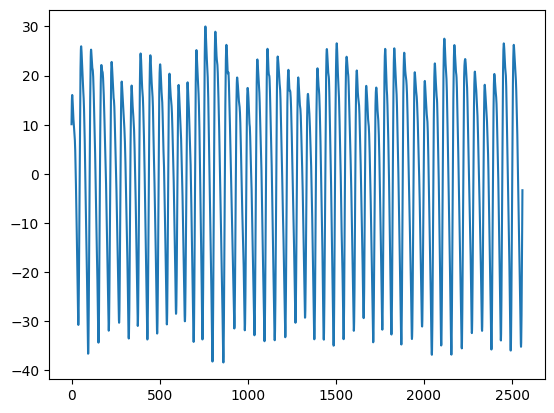

In [72]:
i=147
plt.plot(df.iloc[i:i+1,0:2560].values.reshape(2560,1))

In [62]:
len(glucose_values)

1877

In [63]:
df['glucose_value']=glucose_values

In [65]:
df.to_csv('extracted_data/002.csv')

In [66]:
df.shape

(1877, 2561)